# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | lubango
Processing Record 7 of Set 1 | sisimiut
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | kataragama
City not found. Skipping...
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | polyarnyy
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | la serena
Processing Record 14 of Set 1 | brookings
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | juegang
Processing Record 17 of Set 1 | jinchang
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | tanabe
Processing Record 20 of Set 1 | kimbe
Processing Record 21 of Set 1 | ambanja
Processing Record 22 of Set 1 | albany

Processing Record 41 of Set 4 | naze
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | kapa'a
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | pimenta bueno
Processing Record 46 of Set 4 | selfoss
Processing Record 47 of Set 4 | leava
Processing Record 48 of Set 4 | likiep
Processing Record 49 of Set 4 | antsiranana
Processing Record 0 of Set 5 | port arthur
Processing Record 1 of Set 5 | posto fiscal rolim de moura
Processing Record 2 of Set 5 | muisne
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | kuantan
Processing Record 5 of Set 5 | la passe
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | port douglas
Processing Record 8 of Set 5 | nar'yan-mar
Processing Record 9 of Set 5 | sitka
Processing Record 10 of Set 5 | weno
Processing Record 11 of Set 5 | johi
Processing Record 12 of Set 5 | mhamid
Processing Record 13 of Set 5 | viedma
Processing Record 14 of Set 5 | kulhudhuffushi
Proce

Processing Record 34 of Set 8 | oranjemund
Processing Record 35 of Set 8 | fort bragg
Processing Record 36 of Set 8 | kyzyl-suu
Processing Record 37 of Set 8 | taibet
City not found. Skipping...
Processing Record 38 of Set 8 | palangkaraya
Processing Record 39 of Set 8 | pumiao
Processing Record 40 of Set 8 | paracatu
Processing Record 41 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 42 of Set 8 | dadonghai
City not found. Skipping...
Processing Record 43 of Set 8 | caleta de carquin
Processing Record 44 of Set 8 | vicuna
Processing Record 45 of Set 8 | novyy turtkul'
Processing Record 46 of Set 8 | urangan
Processing Record 47 of Set 8 | upata
Processing Record 48 of Set 8 | qarazhal
Processing Record 49 of Set 8 | alotau
City not found. Skipping...
Processing Record 0 of Set 9 | saldanha
Processing Record 1 of Set 9 | belidzhi
Processing Record 2 of Set 9 | dakhla
Processing Record 3 of Set 9 | huanggang
Processing Record 4 of Set 9 | tura
Processing Record 5 of Se

Processing Record 20 of Set 12 | whakatane
Processing Record 21 of Set 12 | forres
Processing Record 22 of Set 12 | san matias
Processing Record 23 of Set 12 | nova xavantina
Processing Record 24 of Set 12 | coruripe
Processing Record 25 of Set 12 | duekoue
Processing Record 26 of Set 12 | wynyard
Processing Record 27 of Set 12 | aykhal
Processing Record 28 of Set 12 | hailar
Processing Record 29 of Set 12 | bel ombre
Processing Record 30 of Set 12 | tobelo
Processing Record 31 of Set 12 | katsuren-haebaru
Processing Record 32 of Set 12 | general villegas
Processing Record 33 of Set 12 | akureyri
Processing Record 34 of Set 12 | nakonde
Processing Record 35 of Set 12 | riversdale
Processing Record 36 of Set 12 | luderitz
Processing Record 37 of Set 12 | kalmunai
Processing Record 38 of Set 12 | tharangambadi
Processing Record 39 of Set 12 | ad dawadimi
Processing Record 40 of Set 12 | tokar
Processing Record 41 of Set 12 | dhidhdhoo
-----------------------------
Data Retrieval Complete

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,288.59,88,100,17.24,SH,1700891870
1,college,64.8569,-147.8028,264.12,84,75,0.00,US,1700891870
2,bethel,41.3712,-73.4140,272.24,61,0,1.54,US,1700891870
3,udachny,66.4167,112.4000,246.73,75,100,1.99,RU,1700891870
4,vila velha,-20.3297,-40.2925,296.12,77,40,9.26,BR,1700891871


In [7]:
import os

# Create the output_data directory if it doesn't exist
output_data_dir = "output_data"
os.makedirs(output_data_dir, exist_ok=True)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_data_dir, "cities.csv"), index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,288.59,88,100,17.24,SH,1700891870
1,college,64.8569,-147.8028,264.12,84,75,0.00,US,1700891870
2,bethel,41.3712,-73.4140,272.24,61,0,1.54,US,1700891870
3,udachny,66.4167,112.4000,246.73,75,100,1.99,RU,1700891870
4,vila velha,-20.3297,-40.2925,296.12,77,40,9.26,BR,1700891871


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

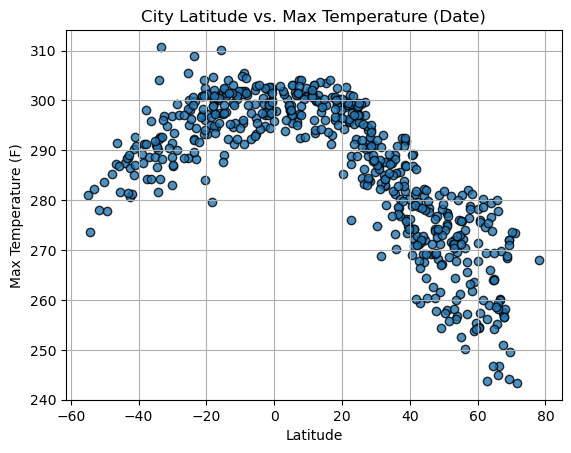

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

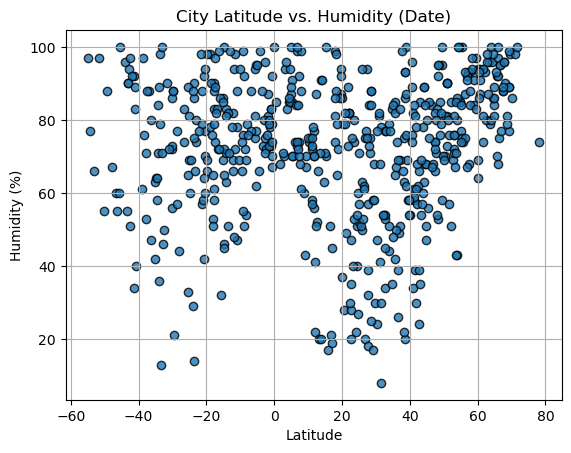

In [10]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

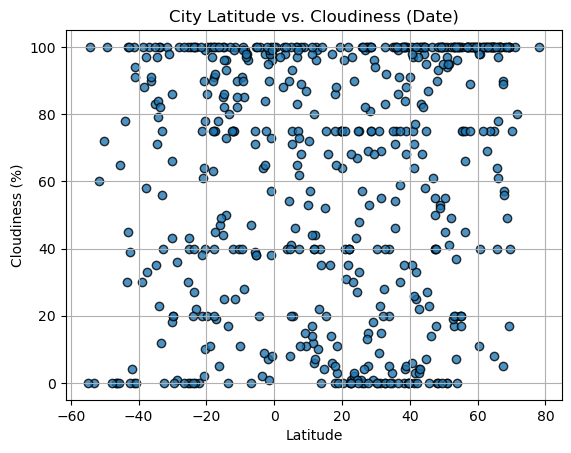

In [11]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

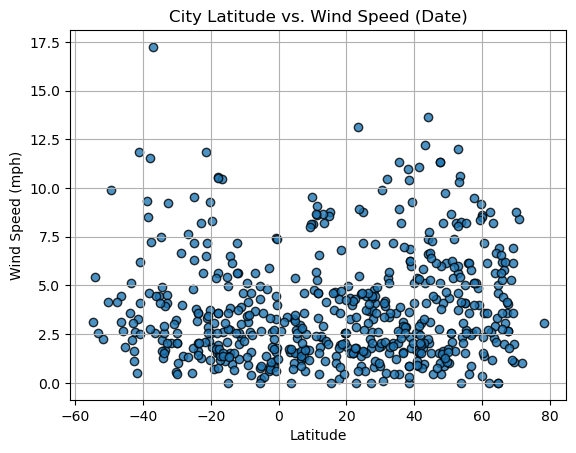

In [12]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Label plot
    plt.title(f"{x_label} vs. {y_label} Linear Regression")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display R-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,264.12,84,75,0.00,US,1700891870
2,bethel,41.3712,-73.4140,272.24,61,0,1.54,US,1700891870
3,udachny,66.4167,112.4000,246.73,75,100,1.99,RU,1700891870
6,sisimiut,66.9395,-53.6735,269.87,77,100,3.05,GL,1700891871
7,longyearbyen,78.2186,15.6401,268.06,74,100,3.09,SJ,1700891871


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Create a DataFrame with Northern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,288.59,88,100,17.24,SH,1700891870
4,vila velha,-20.3297,-40.2925,296.12,77,40,9.26,BR,1700891871
5,lubango,-14.9172,13.4925,289.07,100,100,0.00,AO,1700891871
8,grytviken,-54.2811,-36.5092,273.66,77,100,5.43,GS,1700891872
11,la serena,-29.9078,-71.2542,286.88,88,20,2.06,CL,1700891872


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8716828628787415


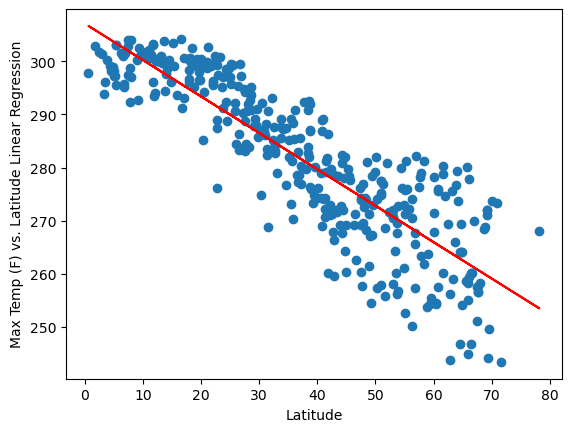

In [16]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(title)

    # Print r-value (correlation coefficient)
    print(f"The r-value is: {r_value}")

    # Show plot
    plt.show()

# Call the function to create the Northern Hemisphere plots
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp (F) vs. Latitude Linear Regression", (10, -20))

The r-value is: 0.6726121075377788


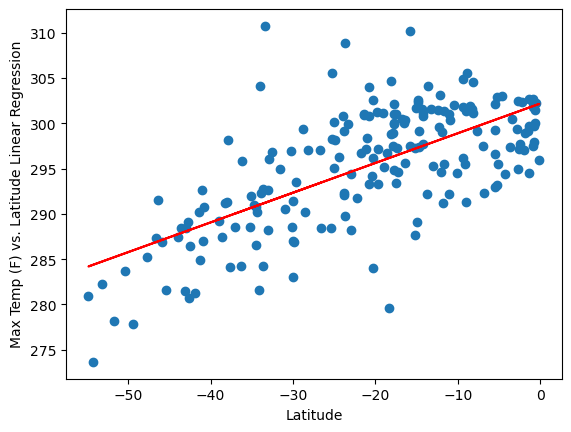

In [17]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(title)

    # Print r-value (correlation coefficient)
    print(f"The r-value is: {r_value}")

    # Show plot
    plt.show()

# Call the function to create the Northern Hemisphere plots
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp (F) vs. Latitude Linear Regression", (10, -20))

For both the Northern and the Southern Hemispheres the distance from the Equator negatively correlated with Max Temperatures, as for both they decreased, the further latitudes from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.278245771595157


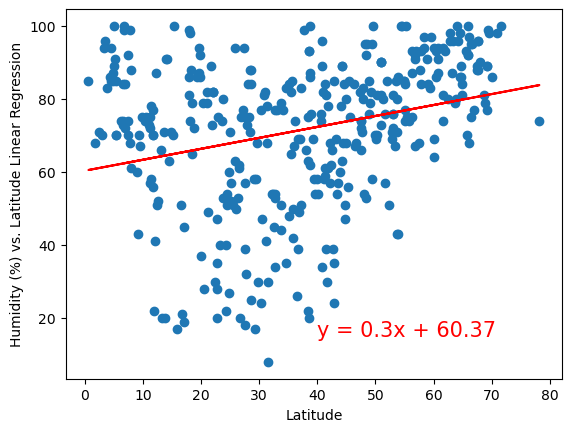

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%) vs. Latitude Linear Regression", (40, 15))

The r-value is: 0.11452708367794852


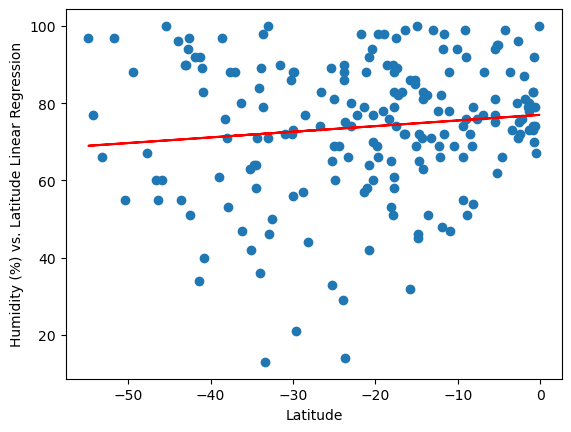

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%) vs. Latitude Linear Regression", (40, 15))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2246583003418671


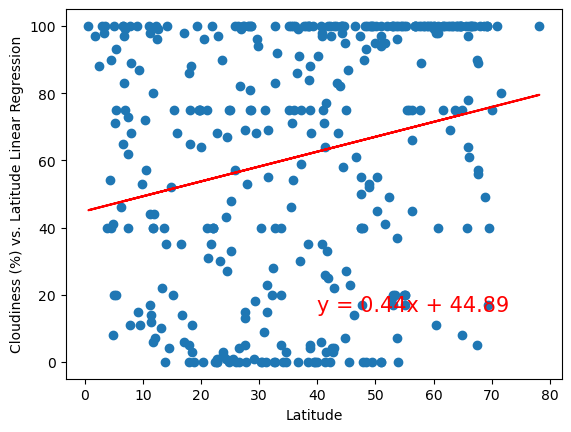

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%) vs. Latitude Linear Regression", (40, 15))

The r-value is: 0.18298487184020204


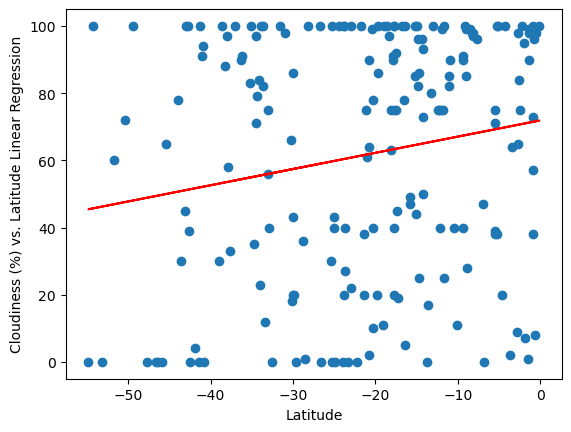

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%) vs. Latitude Linear Regression", (40, 15))

Cloudiness is positively correlated with distance from the Equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15507090235413443


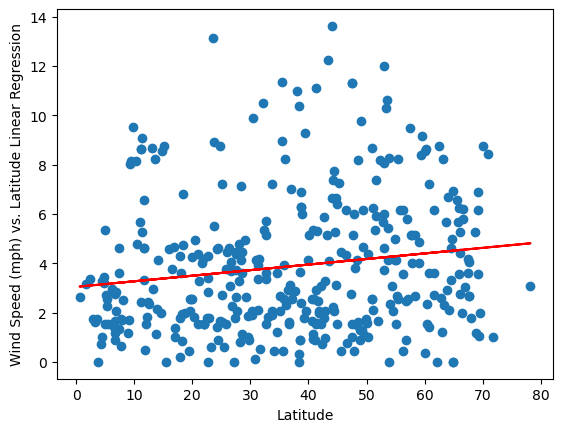

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (mph) vs. Latitude Linear Regression", (40, 25))

The r-value is: -0.2099615249247286


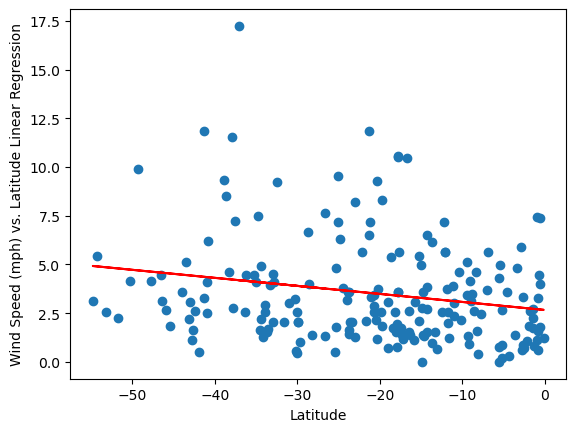

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (mph) vs. Latitude Linear Regression", (40, 25))

Windiness does not have a strong correlation either way.